In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [2]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


In [3]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(57,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/30


386/386 [==============================] - 2s 2ms/step - loss: 0.2391 - accuracy: 0.9313
Epoch 2/30
386/386 [==============================] - 1s 2ms/step - loss: 0.2022 - accuracy: 0.9413
Epoch 3/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9413
Epoch 4/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1931 - accuracy: 0.9413
Epoch 5/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1904 - accuracy: 0.9412
Epoch 6/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1899 - accuracy: 0.9413
Epoch 7/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1878 - accuracy: 0.9413
Epoch 8/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1873 - accuracy: 0.9413
Epoch 9/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1859 - accuracy: 0.9413
Epoch 10/30
386/386 [==============================] - 1s 2ms/step - loss: 0.1858 - accuracy: 0.

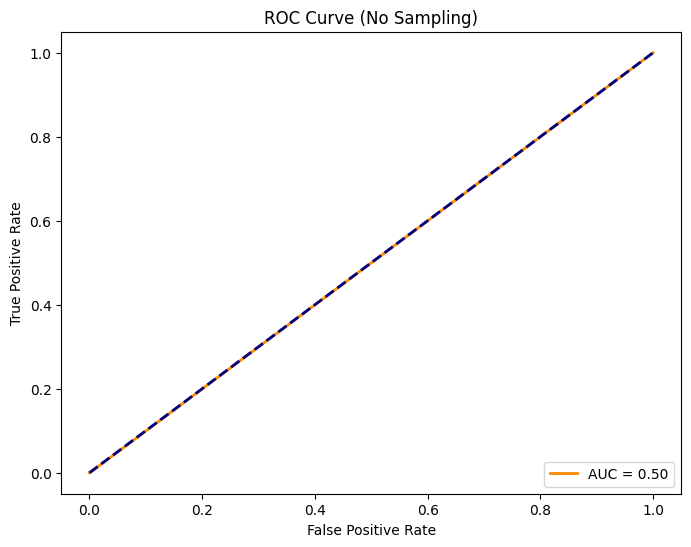

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.5653 - accuracy: 0.7241
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5118 - accuracy: 0.7619
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5000 - accuracy: 0.7614
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4915 - accuracy: 0.7662
Epoch 5/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4837 - accuracy: 0.7675
Epoch 6/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7736
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4642 - accuracy: 0.7793
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7849
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4473 - accuracy: 0.7907
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.7965
Epoch 11/3

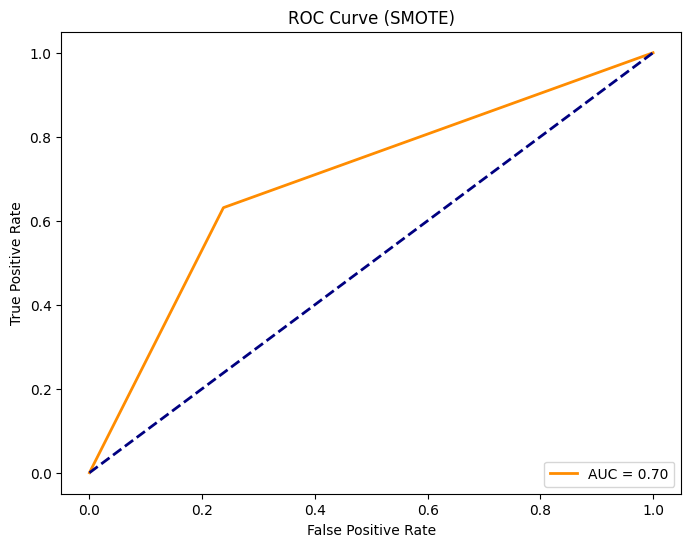

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5847 - accuracy: 0.6915
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5151 - accuracy: 0.7507
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4919 - accuracy: 0.7592
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.7698
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4614 - accuracy: 0.7784
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4515 - accuracy: 0.7832
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4439 - accuracy: 0.7893
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4378 - accuracy: 0.7930
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4323 - accuracy: 0.7957
Epoch 10/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4274 - accuracy: 0.7999

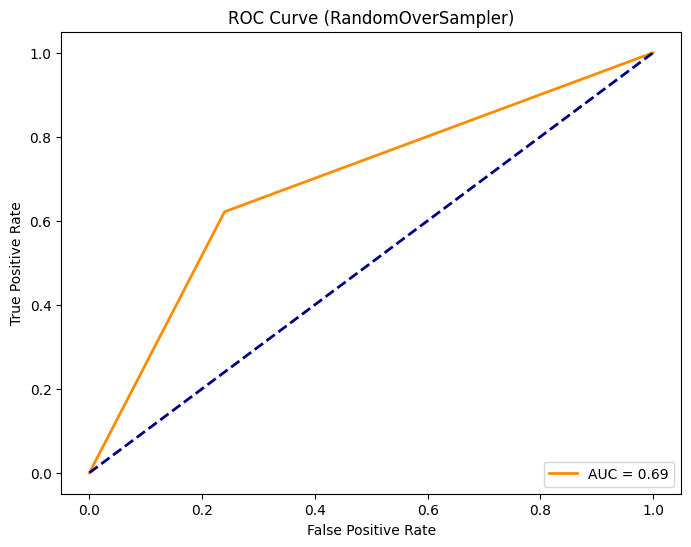

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 2ms/step - loss: 0.6751 - accuracy: 0.5698
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6374
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.6768
Epoch 4/30
46/46 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7003
Epoch 5/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7141
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7314
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7465
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7472
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7597
Epoch 10/30
46/46 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.7645
Epoch 11/30
46/46 [===========

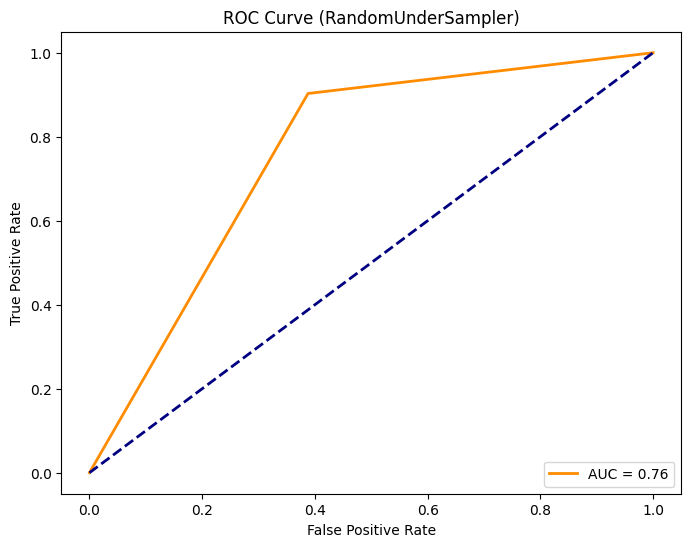

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


337/337 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.9097
Epoch 2/30
337/337 [==============================] - 1s 2ms/step - loss: 0.2236 - accuracy: 0.9327
Epoch 3/30
337/337 [==============================] - 1s 2ms/step - loss: 0.2123 - accuracy: 0.9327
Epoch 4/30
337/337 [==============================] - 1s 2ms/step - loss: 0.2052 - accuracy: 0.9327
Epoch 5/30
337/337 [==============================] - 1s 2ms/step - loss: 0.2009 - accuracy: 0.9327
Epoch 6/30
337/337 [==============================] - 1s 2ms/step - loss: 0.1978 - accuracy: 0.9327
Epoch 7/30
337/337 [==============================] - 1s 2ms/step - loss: 0.1952 - accuracy: 0.9325
Epoch 8/30
337/337 [==============================] - 1s 2ms/step - loss: 0.1930 - accuracy: 0.9326
Epoch 9/30
337/337 [==============================] - 1s 2ms/step - loss: 0.1915 - accuracy: 0.9326
Epoch 10/30
337/337 [==============================] - 1s 2ms/step - loss: 0.1900 - accuracy: 0.9326
Epoch 11/3

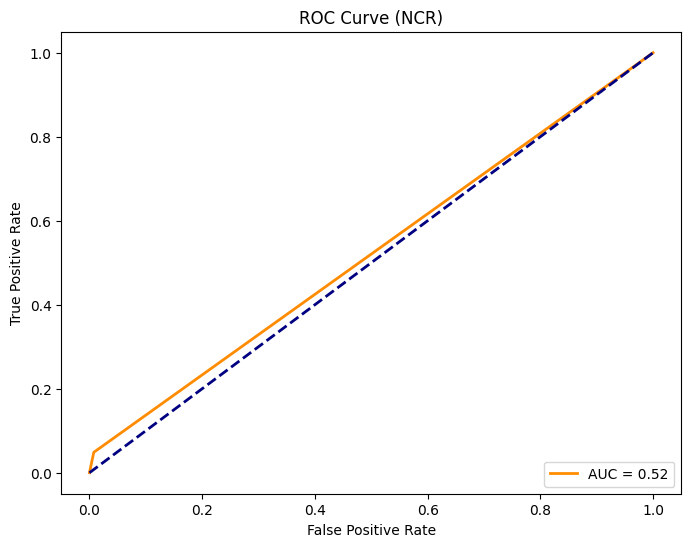

In [4]:
results={}

#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_test, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_test, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_test, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

#ncr
X_ncr, y_ncr = ncr(X_train, y_train)
metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [5]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.903,0.143,0.247,0.632
SMOTE,0.631,0.160,0.255,0.754
RandomOverSampler,0.621,0.156,0.250,0.751
NCR,0.049,0.312,0.084,0.929
No Sampling,0.000,0.000,0.000,0.933


```Feature Selection```

In [7]:
# model= KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
#                             hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)

# for_features = forward_select(model, X_train, y_train)

# back_features = backward_select(model, X_train, y_train)

# rf_features = rf_select(X_train, y_train)

# print("Best forward select features: " + for_features)
# print("Best back select features: " + back_features)
# print("Best rf select features: " + rf_features)

```Hyper-Parameter Tuning```

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score


# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001,0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30,40],  # Number of training epochs
    'dropout_rate': [0.0, 0.1,0.2],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point u

KeyboardInterrupt: 

In [ ]:

def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', 
                            dropout_rate=0.2, 
                            hidden_units=32, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

In [ ]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann_tuned(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann_tuned(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann_tuned(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann_tuned(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]
X_ncr, y_ncr = ncr(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_ncr)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann_tuned(X_train_scaled, y_ncr, X_test_scaled, y_test,'NCR')
results[metrics[0]] = metrics[1:]

NameError: name 'StandardScaler' is not defined

In [ ]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
SMOTE,69.90,16.67,26.92,74.64
RandomUnderSampler,90.29,14.22,24.57,62.97
RandomOverSampler,70.87,14.48,24.05,70.10
No Sampling,0.00,0.00,0.00,93.32
NCR,0.00,0.00,0.00,93.26
